In [1]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model = "x35"
rcs_file = "../output/" + model + '_rcs.csv'
exePath = "C://development//optix//OptixRCS//build//bin//Release//RcsSpeedBranch.exe"

In [3]:
phi = "0,360,1"
theta = "0,180,1"
freq = "5E8"
subprocess.run([exePath, str(freq), str(phi), str(theta), model])

In [4]:
csv = np.genfromtxt (rcs_file, delimiter=",")

# csv = csv[~np.isnan(csv[:,3])]
# Extract phi and rcs columns from the DataFrame
freq_values = csv[:,0]
phi_values = csv[:,1]
theta_values = csv[:,2]
rcs_values = csv[:,3]
print(rcs_values.shape)
print("rcs max: ", max(rcs_values))
print("rcs min: ", min(rcs_values))

(65341,)
rcs max:  nan
rcs min:  nan


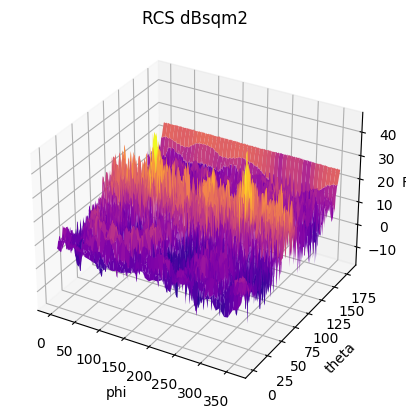

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

data = csv[:,1:]
# Create a grid of values
x = phi_values
y = theta_values
R = rcs_values

x_grid, y_grid = np.meshgrid(np.unique(x), np.unique(y))
R_grid = R.reshape(len(np.unique(x)), len(np.unique(y))).T

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_grid, y_grid, R_grid, cmap=cm.plasma)

plt.xlabel('phi')
plt.ylabel('theta')
ax.set_zlabel('RCS')
plt.title('RCS dBsqm2')

plt.show()